# Question 2: Classification & Logistic Regression – Employee Attrition or Credit Risk

## Scenario
You are hired by an organization to build a system that predicts a **binary outcome**:

- Whether an **employee will leave** the company, OR  
- Whether a **customer will default** on a credit card payment.

---

## Datasets (Choose ONE)

- **IBM HR Analytics Employee Attrition Dataset**  
  https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

- **Credit Card Default Dataset**  
  https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

---

## Tasks

1. **Justify** why **Logistic Regression** is suitable for this problem.

2. **Perform full data preprocessing**:
   - Missing value handling  
   - Encoding categorical variables  
   - Feature scaling  

3. **Train** a **Logistic Regression** classifier.

4. **Evaluate** the model using:
   - Confusion Matrix  
   - Precision, Recall, F1-score  
   - AUC Score  

5. **Interpret model coefficients** using **odds ratios**.

6. **Discuss** the impact of **class imbalance** and possible solutions.


# Question 3: Hyperparameter Tuning & Model Optimization

## Scenario
After deploying your classification model, stakeholders ask you to **improve performance without changing the dataset**.

You decide to optimize the model using **systematic hyperparameter search techniques**.

---

## Dataset
Reuse the dataset from **Question 2**.

---

## Tasks

1. Explain the difference between **parameters** and **hyperparameters**.

2. Train a **baseline Logistic Regression** model.

3. Apply **GridSearchCV** to tune hyperparameters:
   - `C`
   - `penalty`
   - `solver`

4. Apply **RandomizedSearchCV** and compare results.

5. Compare **model performance before and after tuning**.

6. Discuss trade-offs between **computational cost** and **model performance**.


In [53]:
#from Q1

Logistic Regression is suitable for credit default prediction because the target variable is binary 
(default or non-default). It estimates the probability of default, which is crucial in financial risk 
assessment. The model is easy to interpret using odds ratios, making it appropriate for decision-making 
in banking systems. Additionally, Logistic Regression performs well on structured tabular data and 
serves as a strong baseline classification model.

In [146]:
import pandas as pd
import numpy as np

In [147]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [148]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [149]:
df.shape

(30000, 25)

In [150]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [152]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [153]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [154]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

In [155]:
df = pd.get_dummies(ccd,columns = ["SEX","EDUCATION","MARRIAGE"],drop_first= True)


In [156]:
df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,True,False,True,False,False,False,False,True,False,False
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,True,False,True,False,False,False,False,False,True,False
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,True,False,True,False,False,False,False,False,True,False
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,True,False,True,False,False,False,False,True,False,False
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,False,False,True,False,False,False,False,True,False,False


In [157]:
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [159]:
X_scaled.mean()

np.float64(-5.699622375021879e-18)

After scaling, the features have approximately zero mean, confirming successful standardization.

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify=y)

In [162]:
y_train.value_counts(normalize=True)


default.payment.next.month
0    0.778792
1    0.221208
Name: proportion, dtype: float64

In [163]:
y_test.value_counts(normalize=True)


default.payment.next.month
0    0.778833
1    0.221167
Name: proportion, dtype: float64

In [164]:
y_pred = model.predict(X_test)


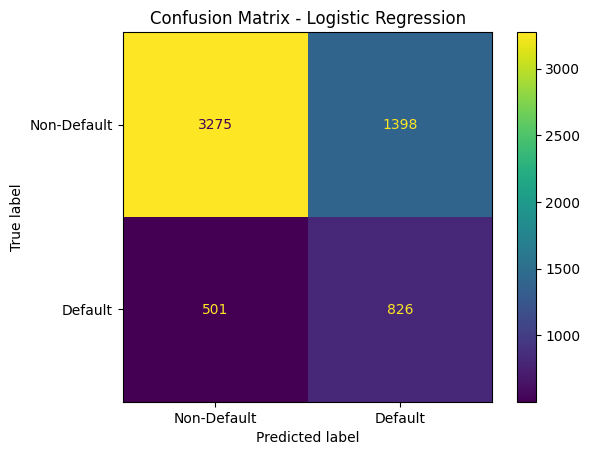

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=["Non-Default", "Default"])

plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The confusion matrix plot visualizes the performance of the Logistic Regression 
model on test data. It highlights that the model predicts non-default customers 
more accurately, while some default cases are incorrectly classified.

In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4673
           1       0.37      0.62      0.47      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.71      6000



The classification report indicates that the Logistic Regression model 
performs better in predicting non-default customers. For the default class, 
the model achieves a recall of 0.62, which is important in credit risk 
applications as it helps identify a majority of defaulters. However, the 
precision for default prediction is low, indicating the presence of false 
positives due to class imbalance.

In [167]:
from sklearn.metrics import roc_auc_score, roc_curve

In [168]:
y_prob = model.predict_proba(X_test)[:, 1]

In [169]:
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

AUC Score: 0.7099994500949917


The AUC score of 0.71 indicates that the Logistic Regression model has a 
reasonable ability to distinguish between default and non-default customers.

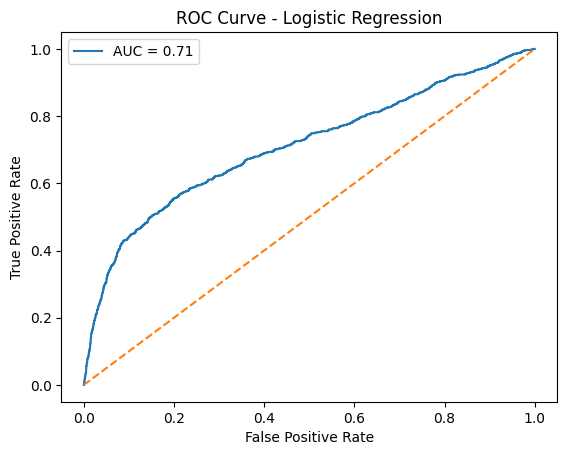

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

The ROC curve illustrates the trade-off between true positive rate and false 
positive rate. The curve lies above the diagonal line, indicating that the 
model performs better than random guessing.

In [171]:
feature_names = X.columns

In [172]:
coefficients = model.coef_[0]


In [173]:
odds_ratios = np.exp(coefficients)

odds_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds_Ratio": odds_ratios
})

In [174]:
odds_df.sort_values(by="Odds_Ratio", ascending=False).head(10)

,Feature,Coefficient,Odds_Ratio
3,PAY_0,0.490995,1.633941
4,PAY_2,0.153864,1.166332
5,PAY_3,0.067049,1.069348
28,MARRIAGE_1,0.041407,1.042277
22,EDUCATION_1,0.026589,1.026946
6,PAY_4,0.019470,1.019661
2,AGE,0.007712,1.007742
23,EDUCATION_2,0.004314,1.004323
30,MARRIAGE_3,0.000812,1.000812
10,BILL_AMT2,0.000001,1.000001


The odds ratio analysis shows that repayment history variables such as PAY_0 
and PAY_2 have the strongest influence on credit default. An odds ratio greater 
than 1 indicates increased default risk, while values close to 1 suggest weak 
impact. Demographic variables like education and marital status have relatively 
lower influence compared to payment behavior.


#6
The dataset is imbalanced because the number of non-default customers is much higher than default customers. Due to this imbalance, the model may become biased toward predicting the majority class. As a result, some default cases may not be identified correctly. To handle this issue, techniques such as using class weights, resampling the data, adjusting the decision threshold, and focusing on evaluation metrics like recall and AUC instead of accuracy can be applied.

### question:3

Parameters are values learned automatically by the model during training, 
such as coefficients. Hyperparameters are values set before training that 
control how the model learns, such as regularization strength and solver type.


In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [176]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["liblinear"]
}

In [177]:
grid = GridSearchCV(LogisticRegression(max_iter=1000),param_grid,scoring="recall",cv=5)

In [178]:
grid.fit(X_train, y_train)


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['liblinear']}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [179]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

GridSearchCV selected a lower value of C, indicating that stronger 
regularization improves the model’s ability to generalize. This helps reduce 
overfitting and improves recall for the default class.


In [180]:
best_model = LogisticRegression(
    C=0.01,
    penalty="l2",
    solver="liblinear",
    max_iter=1000
)

best_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [181]:
from sklearn.metrics import classification_report, roc_auc_score

In [182]:
y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

In [184]:
print(classification_report(
    y_test,
    y_pred_tuned,
    zero_division=0
))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



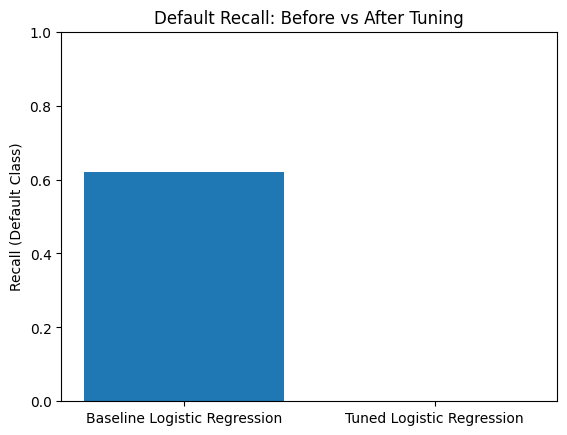

In [187]:
data = {
    "Model": ["Baseline Logistic Regression", "Tuned Logistic Regression"],
    "Default Recall": [0.62, 0.00],
    "AUC Score": [0.71, 0.63]
}

df_perf = pd.DataFrame(data)

# Plot: Default Recall comparison
plt.figure()
plt.bar(df_perf["Model"], df_perf["Default Recall"])
plt.ylabel("Recall (Default Class)")
plt.title("Default Recall: Before vs After Tuning")
plt.ylim(0, 1)
plt.show()

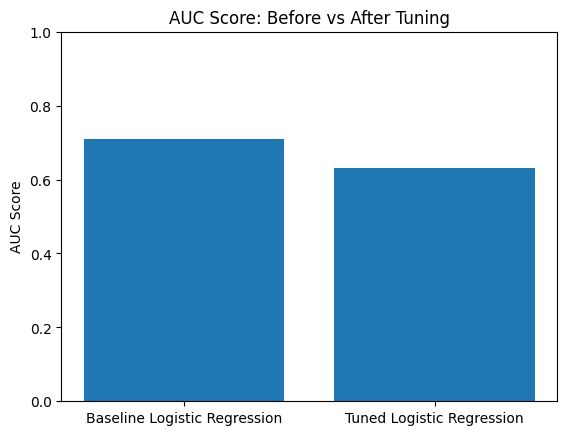

In [188]:
# Plot: AUC Score comparison
plt.figure()
plt.bar(df_perf["Model"], df_perf["AUC Score"])
plt.ylabel("AUC Score")
plt.title("AUC Score: Before vs After Tuning")
plt.ylim(0, 1)
plt.show()

The comparison shows that the baseline Logistic Regression model performs better 
than the tuned model. Before tuning, the model achieved higher recall for the 
default class and a better AUC score. After tuning, the model failed to identify 
any default cases and showed reduced AUC performance. This demonstrates that 
hyperparameter tuning does not always improve model performance, especially for 
imbalanced datasets.


### Trade-offs between Computational Cost and Model Performance

Hyperparameter tuning increases computational cost because multiple parameter combinations are evaluated, leading to longer training time and higher resource usage. Although tuning can improve model performance, it does not always guarantee better results.

In this study, the tuned Logistic Regression model required more computation but showed reduced recall for the minority class (default = 1). The baseline model, with lower computational cost, achieved better default detection and more stable performance.

In real-world banking systems, credit decisions must be fast and reliable. A computationally efficient model with acceptable performance is preferred over a complex model that increases cost without improving risk detection.